Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Loading the data

In [4]:
df=pd.read_csv('loan_prediction[1].csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Checking for shape of data
df.shape

(614, 13)

There are 614 rows and 13 columns


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Here Loan_status in the target column and rest are all features column

In [9]:
# Checking data Types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are object,float and int type data. since the target is loan approved or not i.e, Either yes or no this is a classification problem.

In [10]:
# Checking missing values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It can be seen that the dataset has missing values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


614 being the number of columns few data are less than 614 and hence few data's need to be handeled for missing values.

In [12]:
# Checking the values for target
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

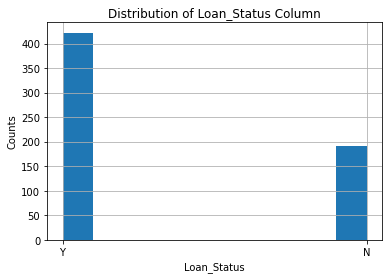

In [13]:
#plotting graph for target column
df['Loan_Status'].hist(grid=True)
plt.ylabel('Counts')
plt.xlabel('Loan_Status')
plt.title('Distribution of Loan_Status Column')
plt.show()

Graph shows that the data is imbalanced where the yes count is 422 and no count is only 192. 

Handling Missing Values For Each Column

1.Gender 

In [20]:
# Checking for value counts
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

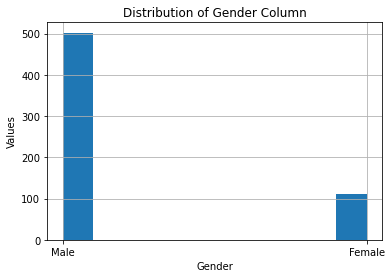

In [21]:
df['Gender'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('Gender')
plt.title('Distribution of Gender Column')
plt.show()

We can see the males are more so going with the data we fill the missimg values with male.

In [22]:
df['Gender'].fillna('Male',inplace=True)

2.Martial Status

In [24]:
# Checking for value counts
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

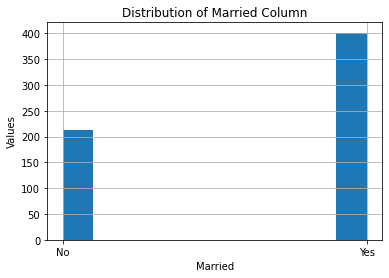

In [26]:
df['Married'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('Married')
plt.title('Distribution of Married Column')
plt.show()

We see that count of married people is high as against people who are single so lets fill the missing values with married status.

In [27]:
df['Married'].fillna('yes',inplace=True)

3.Dependents

In [28]:
# Checking for value counts
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

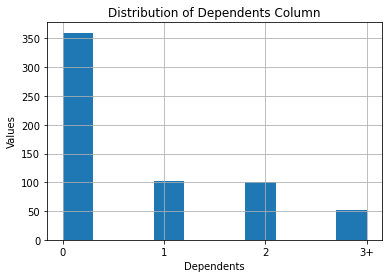

In [29]:
df['Dependents'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('Dependents')
plt.title('Distribution of Dependents Column')
plt.show()

We see that the majority of them have zero dependent values.so let's fill the missing values with zero.

In [30]:
df['Dependents'].fillna('0',inplace=True)

4.Self_Employed

In [31]:
# Checking for value counts
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

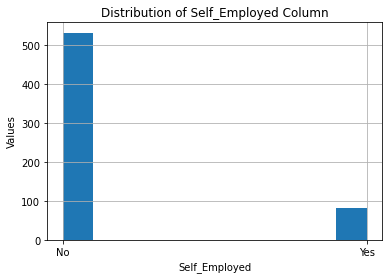

In [32]:
df['Self_Employed'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('Self_Employed')
plt.title('Distribution of Self_Employed Column')
plt.show()

From plot we observe very few are self employed. so lets fill the values with 'no'

In [34]:
df['Self_Employed'].fillna('No',inplace=True)

5.Loan Amount

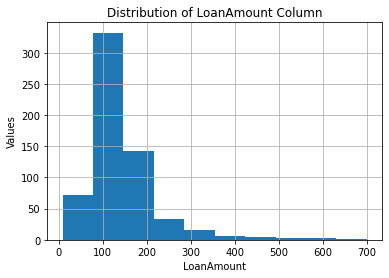

In [38]:
df['LoanAmount'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('LoanAmount')
plt.title('Distribution of LoanAmount Column')
plt.show()

In [35]:
# Checking for mean value since the value cant be catagorical
df['LoanAmount'].mean()

146.41216216216216

In [36]:
# Replacing missing amount with the mean amount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

6. Loan Amount Term

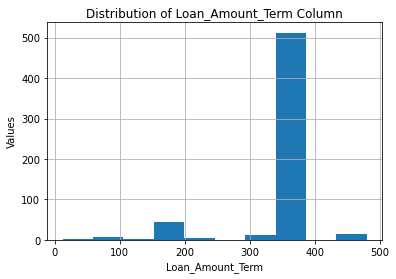

In [39]:
df['Loan_Amount_Term'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('Loan_Amount_Term')
plt.title('Distribution of Loan_Amount_Term Column')
plt.show()

In [37]:
#Checking for the median of loan amount term
df['Loan_Amount_Term'].median()

360.0

In [40]:
# Replacing the missing values with the median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

7.Credit History

In [41]:
# Checking for the value count.
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

The missing value can be filled with 1 as many have a score of 1.

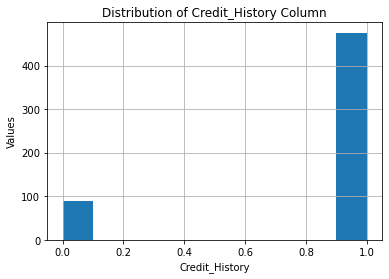

In [42]:
df['Credit_History'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('Credit_History')
plt.title('Distribution of Credit_History Column')
plt.show()

In [43]:
# Replacing the missing values.
df['Credit_History'].fillna('1.0', inplace=True)

Lets check if we have covered all the missing values

In [44]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

Features = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for F in Features:
    df[F] = LE.fit_transform(df[F])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [52]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,1.000000


In [53]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.076120,-0.022549


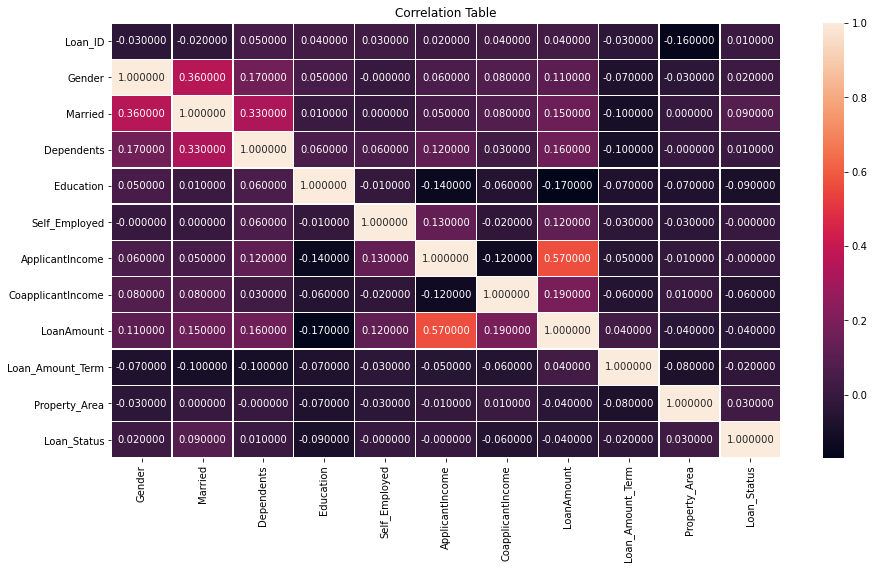

In [54]:
# Plotting heatmap for the correlation table
plt.figure(figsize=[15,8])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

Married has 9% correlation with the target column.
Property_Area has 3% correlation with the target column.
Gender has 2% correlation with the target column.
Dependents has 1% correlation with the target column.

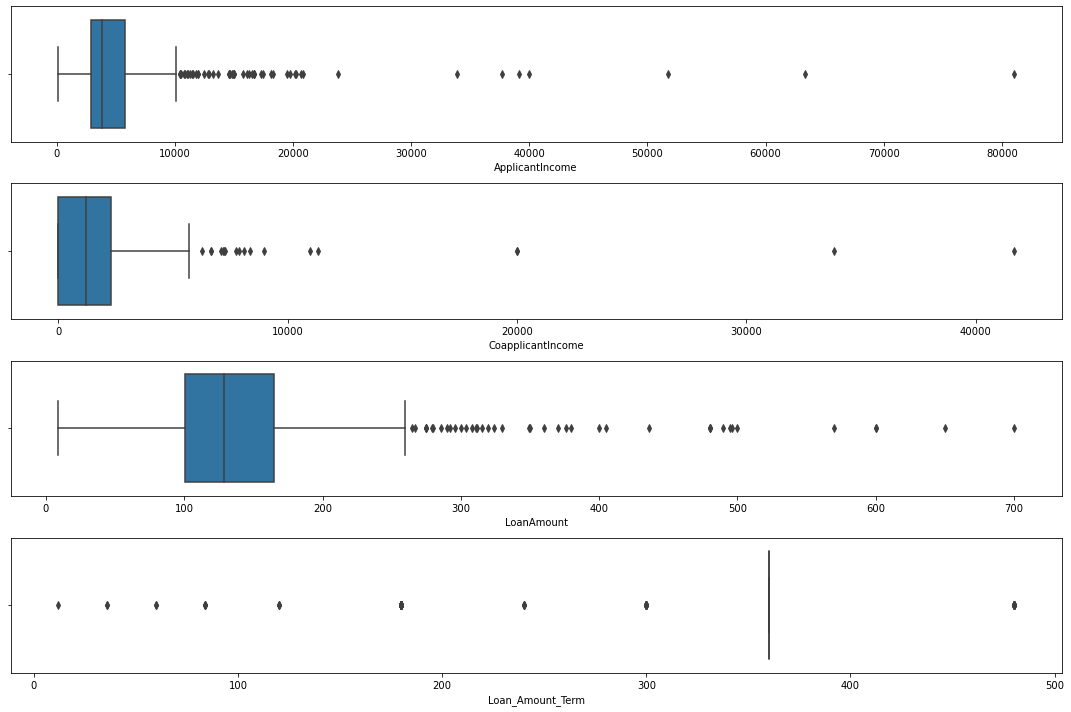

In [59]:
# Checking Outliers
fig, axs = plt.subplots(4, figsize = (15,10))
plt1 = sns.boxplot(df['ApplicantIncome'], ax = axs[0], orient='v')
plt2 = sns.boxplot(df['CoapplicantIncome'], ax = axs[1], orient='v')
plt3 = sns.boxplot(df['LoanAmount'], ax=axs[2], orient='v')
plt4 = sns.boxplot(df['Loan_Amount_Term'], ax = axs[3], orient='v')
plt.tight_layout()

Outliers are present in all numerical feature columns

In [60]:
# Checking for Skewness
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Skewness is present in data.

In [63]:
# Splitting datd into dependent and independent column
x = df.drop(["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"], axis=1)
y = df["Loan_Status"]

In [64]:
# Removing Skewness
from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[ 0.5443313 , -1.10283684,  0.23538679,  0.17554004,  0.41173269],
       [ 0.17097382,  0.75057774, -0.0376586 ,  0.17554004,  0.41173269],
       [-0.49995512, -1.10283684, -1.34630531,  0.17554004,  0.41173269],
       ...,
       [ 1.02348683,  0.20860307,  1.37240931,  0.17554004,  0.41173269],
       [ 0.93175029, -1.10283684,  0.73892362,  0.17554004,  0.41173269],
       [ 0.17097382, -1.10283684,  0.03993645,  0.17554004, -2.42876026]])

In [65]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.5443313 , -1.10283684,  0.23538679,  0.17554004,  0.41173269],
       [ 0.17097382,  0.75057774, -0.0376586 ,  0.17554004,  0.41173269],
       [-0.49995512, -1.10283684, -1.34630531,  0.17554004,  0.41173269],
       ...,
       [ 1.02348683,  0.20860307,  1.37240931,  0.17554004,  0.41173269],
       [ 0.93175029, -1.10283684,  0.73892362,  0.17554004,  0.41173269],
       [ 0.17097382, -1.10283684,  0.03993645,  0.17554004, -2.42876026]])

In [66]:
# Handling data imbalance by oversampling
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [67]:
# Checking y count
y_over.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

Now data looks Balanced

In [69]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)


The best accuracy is  0.7867298578199052  on Random_State  501


In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.21, random_state=28)

Model Training

1.Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test, predlr))

0.7359550561797753
[[47 43]
 [ 4 84]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.67        90
           1       0.66      0.95      0.78        88

    accuracy                           0.74       178
   macro avg       0.79      0.74      0.72       178
weighted avg       0.79      0.74      0.72       178



This gives 73% accuracy.

Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predrf = RF.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.7528089887640449
[[65 25]
 [19 69]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75        90
           1       0.73      0.78      0.76        88

    accuracy                           0.75       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.75      0.75      0.75       178



THis gives 75% accuracy.

Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
preddt = DT.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7584269662921348
[[66 24]
 [19 69]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        90
           1       0.74      0.78      0.76        88

    accuracy                           0.76       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.76      0.76      0.76       178



This also gives 75% accuracy

In [87]:
#cross validation score for LR
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())


Cross validation score for LogisticRegression is  0.809462881514061


In [88]:
#Checking cross validation score of DecisionTree Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(DT,x,y,cv=5)
print('Cross validation score for DecisionTree Classifier is ',scr.mean())


Cross validation score for DecisionTree Classifier is  0.7117286418765827


In [89]:
#Checking cross validation score of RandomForest Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForestClassifier is ',scr.mean())

Cross validation score for RandomForestClassifier is  0.7801012928162068


We can consider Random Forest Classifier as the best fit model since the difference between the accurarcy and cross validation id minimum. 

Hyper Parameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV

#RandomForestClassifier
parameters = {'n_estimators': [200,700], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion':['gini', 'entropy']}

In [91]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [92]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [93]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [94]:
model = RandomForestClassifier(criterion='gini', max_features='log2', n_estimators =700)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))

77.52808988764045
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        90
           1       0.76      0.81      0.78        88

    accuracy                           0.78       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.78      0.78      0.78       178



We have 77.5% accuracy after hyper parameter tunning.

In [95]:
#saving the model
import pickle
filename = 'loan_application_status.pkl'
pickle.dump(model, open(filename, 'wb'))